Imagem do QR code foi salva em qr_code_estoque.png


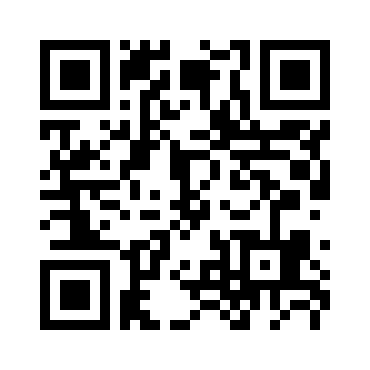

In [6]:
!pip install qrcode

import qrcode
from IPython.display import display

# Dados de estoque (exemplo)
estoque = {
    "produto": "Camiseta",
    "quantidade": 100,
    "preco": 25.00
}

# Formatar os dados como uma string
dados_estoque = f"Produto: {estoque['produto']}\nQuantidade: {estoque['quantidade']}\nPreço: R${estoque['preco']}"

# Criar o QR code com os dados de estoque
qr = qrcode.QRCode(
    version=1,
    error_correction=qrcode.constants.ERROR_CORRECT_L,
    box_size=10,
    border=4,
)
qr.add_data(dados_estoque)
qr.make(fit=True)

# Criar uma imagem do QR code
imagem_qr = qr.make_image(fill_color="black", back_color="white")

# Salvar a imagem do QR code
caminho_imagem_qr = "qr_code_estoque.png"
imagem_qr.save(caminho_imagem_qr)

print("Imagem do QR code foi salva em", caminho_imagem_qr)

# Exibir o QR code
display(imagem_qr)


In [15]:
!pip install qrtools

  Preparing metadata (setup.py) ... done
  Created wheel for qrtools: filename=qrtools-0.0.2-py3-none-any.whl size=11211 sha256=05e61a710c0c3bfe5412e145950e769fbd0115862261745a847e4b5c03d082d0
  Stored in directory: /root/.cache/pip/wheels/4f/83/35/61de880c87db7a03a8bd1462d0b1c250d6bab5d04611e1d9f8
Successfully built qrtools


In [17]:
import cv2
import numpy as np
import csv
import pandas as pd

def ler_qr_code(imagem):
    # Converte a imagem para tons de cinza
    gray_img = cv2.cvtColor(imagem, cv2.COLOR_BGR2GRAY)

    # Inicializa um detector QRCode
    detector = cv2.QRCodeDetector()

    # Detecta e decodifica o QR code
    decoded_data, points, _ = detector.detectAndDecode(gray_img)

    return decoded_data

def salvar_em_csv(informacao, nome_arquivo):
    with open(nome_arquivo, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        # Escreve a informação no arquivo CSV
        writer.writerow([informacao])

def main():
    # Caminho da imagem contendo o QR code (pode ser modificado)
    caminho_imagem_qr = "qr_code_estoque.png"
    
    # Carregar a imagem contendo o QR code
    imagem = cv2.imread(caminho_imagem_qr)

    # Lê as informações do QR code
    informacao_qr = ler_qr_code(imagem)
    
    if informacao_qr:
        # Salva as informações em um arquivo CSV
        nome_arquivo_csv = "informacoes_estoque.csv"
        salvar_em_csv(informacao_qr, nome_arquivo_csv)

        print("O QR code foi lido com sucesso e as informações foram salvas em", nome_arquivo_csv)

        # Exibir as informações em uma tabela
        data = {'Informação do QR Code': [informacao_qr]}
        df = pd.DataFrame(data)
        print("\nInformações do QR Code:")
        print(df.to_string(index=False))
    else:
        print("Nenhuma informação foi encontrada no QR code.")

if __name__ == "__main__":
    main()


O QR code foi lido com sucesso e as informações foram salvas em informacoes_estoque.csv

Informações do QR Code:
                            Informação do QR Code
Produto: Camiseta\nQuantidade: 100\nPreço: R$25.0
